In [21]:
# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# %matplotlib inline

# import seaborn as sns
# color = sns.color_palette()
# sns.set_palette("husl")

## Capstone v1 -- mostly EDA 

In [4]:
# Basic notebook setup

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette('husl')
sns.set_palette("husl")

In [5]:
aisles = pd.read_csv("aisles.csv")
print("Shape of aisles: {}".format(aisles.shape))
print("")
print("Aisle Datatypes:")
print(aisles.dtypes)
print("") # linebreak
aisles.head()

Shape of aisles: (134, 2)

Aisle Datatypes:
aisle_id     int64
aisle       object
dtype: object



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# load departments dataset
departments = pd.read_csv("departments.csv")
print("Shape of Departments: {}".format(departments.shape))
print("")
print("Depts Datatypes:")
print(departments.dtypes)
print("")
departments.head()

Shape of Departments: (21, 2)

Depts Datatypes:
department_id     int64
department       object
dtype: object



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# load products dataset
products = pd.read_csv("products.csv")
print("Shape of Products.csv: {}".format(products.shape))
print("")
print("Products Datatypes:")
print(products.dtypes)
print("")
products.head()

Shape of Products.csv: (49688, 4)

Products Datatypes:
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
# testing color palette

# def sinplot(flip=1):
#     x = np.linspace(0, 14, 100)
#     for i in range(1, 7):
#         plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
# #sns.set_palette("husl")
# sinplot()

In [9]:
# describe ALL the things!
#aisles.describe
#departments.describe
#products.describe

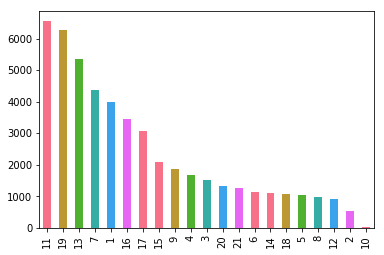

In [10]:
# plot products per department
products.department_id.value_counts().plot(kind='bar')

# how to assign departments.department as the X (instead of 1, frozen)?

In [11]:
# let's merge some stuff and see how it goes

products_departments = pd.merge(left=products, right=departments, how="left")
products_departments.head()

#PERF

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


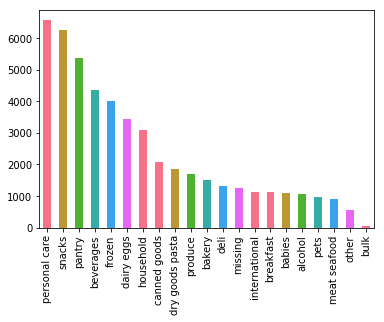

In [12]:
# plot products per department, but with the right naming scheme
products_departments.department.value_counts().plot(kind='bar')


## Dumb idea: use itertools.combinations to create all possible feature combinations and then grind through them on a server to see which hold water. 

Is it possible to grind through f1 scoring with scikit? Hmmmm

In [13]:
# Add in the aisle names into one dataset called 'pda'
pda = pd.merge(left=products_departments, right=aisles, how="left")
pda.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


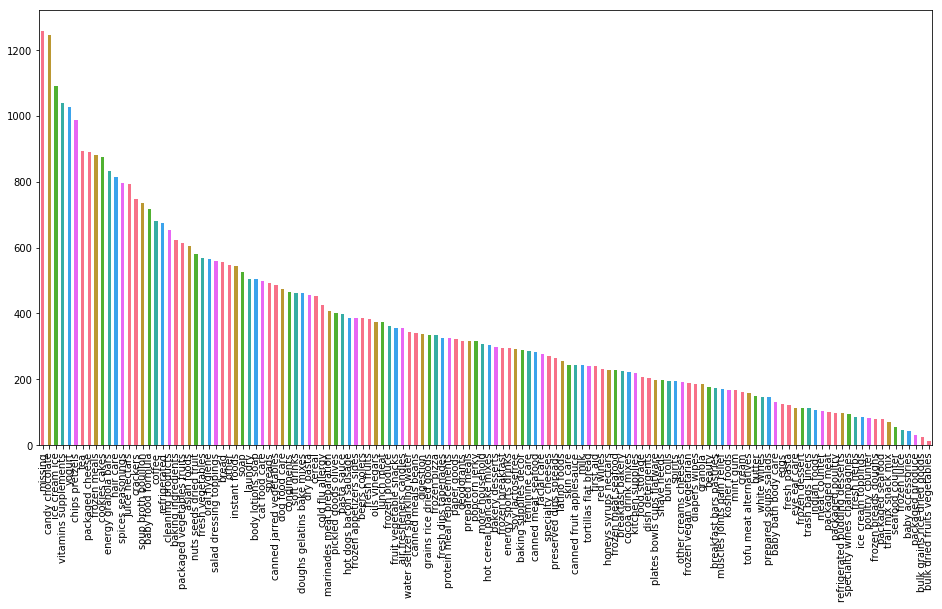

In [14]:
pda.aisle.value_counts().plot(kind='bar', figsize=(16,8))


The largest aisle is "missing", with #2 being "Candy", and #3 being "Ice Cream". This makes me think that my initial hypothesis about junk food is correct.

In [15]:
## Why is this broken????

#products_departments.aisle_id["1"].value_counts()

In [16]:
# show the counts, since the above graph is a nightmare

catalog_count = pda.department.value_counts()
print(catalog_count)

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64


In [17]:

aisle_count = pda.aisle.value_counts()
print(aisle_count)

missing                          1258
candy chocolate                  1246
ice cream ice                    1091
vitamins supplements             1038
yogurt                           1026
chips pretzels                    989
tea                               894
packaged cheese                   891
frozen meals                      880
cookies cakes                     874
energy granola bars               832
hair care                         816
spices seasonings                 797
juice nectars                     792
crackers                          747
soup broth bouillon               737
baby food formula                 718
coffee                            680
refrigerated                      675
cleaning products                 655
baking ingredients                623
packaged vegetables fruits        615
asian foods                       605
nuts seeds dried fruit            582
fresh vegetables                  569
oral hygiene                      565
salad dressi

In [18]:
# plot departments by volume && divided by aisles 
## holy shit this crashes the laptop due to extreme OOM 
### will buy new laptop later 
#pda.hist(column='department', by='aisle'); 

# do some groupbys instead 

In [19]:
# plot bar chart by days of week



In [20]:
# plot histogram with combined day of week and hour of day to find order hotspots




In [21]:
# prior orders per customer



In [22]:
# number of products per order



## Biggins

In [25]:
# # order products train dataset
kaggle_train = pd.read_csv("training_data/order_products__train.csv")
print("Size of order products training dataset: {}".format(kaggle_train.shape))

Size of order products training dataset: (1384617, 4)


In [26]:
kaggle_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [28]:
# prior dataset - full dataset always crashes, so using a subset
kaggle_prior = pd.read_csv("training_data/order_products__prior_smol.csv")
print("Size of order prior dataset: {}".format(kaggle_prior.shape))

Size of order prior dataset: (4999999, 4)


In [29]:
kaggle_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [30]:
# # orders dataset
orders = pd.read_csv("training_data/orders.csv")
print("Size of orders dataset: {}".format(orders.shape))

Size of orders dataset: (3421083, 7)


In [31]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [33]:
### Remove orders where days_since_prior_order is empty
### since it's impossible to determine reorder as it's their first order

In [34]:
# merge order train and orders dataset
order_merged = pd.merge(left=kaggle_train, right=orders, how="left", on="order_id")

In [35]:
order_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [36]:
order_merged = pd.merge(left=order_merged, right=pda[["product_id", "aisle_id", "department_id"]], how="left", on="product_id")

In [37]:
order_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,95,15


## Generating features

In [ ]:
# 